## Overview of the Problem set
\
**Statement for lr_utils:**\
\
The class load_dataset in the lr_utils load the dataset from test_catvnocat.h5 and train_catvnocat.h5 in the document datasets.\
```python
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

m_train = None
m_test = None
num_px = None

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# The structures of data
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# The structure of a photo
index = 208
train_set_x_orig_index = train_set_x_orig[index] 
print("train_set_x_orig.shape of " + str(index) + "th photo", train_set_x_orig_index.shape)


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
train_set_x_orig.shape of 208th photo (64, 64, 3)


**The structures of data:**\
\
Number of training examples: m_train = 209\
Number of testing examples: m_test = 50\
Height/Width of each image: num_px = 64\
Each image is of size: (64, 64, 3)\
train_set_x shape: (209, 64, 64, 3)\
train_set_y shape: (1, 209)\
test_set_x shape: (50, 64, 64, 3)\
test_set_y shape: (1, 50)\
train_set_x_orig.shape of 208th photo (64, 64, 3)

y = [0], it's a 'non-cat' picture.


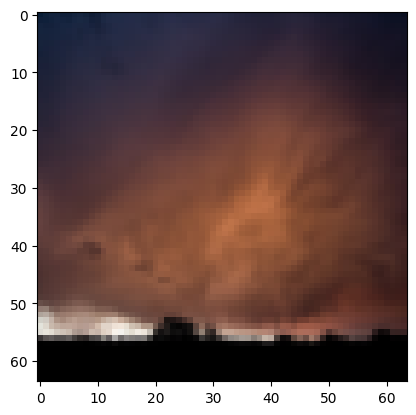

In [3]:
# Example of a picture
index = 208
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

**Flatten the datasets**\
\
We could use X.reshape or reshaped(X).\
\
`X.reshape(dimension,-1)` means it will be flatten as dimension $*$ a flattened dimension(equals to totaldimesion $/$ diemension).

In [4]:
'''flatten the images'''

train_set_x_flatten = None
test_set_x_flatten = None

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Another way to reshape:**\
```python
np.reshape(X,size)
```
size=(m,n,$\dots$)

In [5]:
'''flatten the images'''

train_set_x_flatten = None
test_set_x_flatten = None

train_set_x_flatten = np.reshape(train_set_x_orig, (np.shape(train_set_x_orig)[0],-1)).T
test_set_x_flatten = np.reshape(test_set_x_orig, (np.shape(test_set_x_orig)[0],-1)).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Standardize the dataset:**\
Take the standard of the whole numpy array.

In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## sigmod functions 

$$sigmod(\omega^{T} x + b ) =\frac{1}{1 + e^{-(\omega^{T} x + b )}}$$

Further, for the whole algorithm:
$$a(z) = sigmod(z)= \frac{1}{1 + e^{-z}} $$
$$z = \omega^{T} x + b $$


In [7]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


## Intializing parameters

Using `dtype` to specify the variable type.

**Notice:**
The element in np.zeros is not a number, it's type is numpy.int ot numpy.float.

the result of `type()` and `X.dtype` is different.

In [8]:
test1 = np.zeros(1,dtype = int)
test2 = np.zeros(1,dtype = float)

#using type function
print("The type of test1 is " + str(type(test1)))
print("The type of test2 is " + str(type(test2)))

#using dtype of numpy
print("The type of test1 is " + str(test1.dtype))
print("The type of test2 is " + str(test2.dtype))

The type of test1 is <class 'numpy.ndarray'>
The type of test2 is <class 'numpy.ndarray'>
The type of test1 is int32
The type of test2 is float64


In [9]:
def initialize_with_zeros(dim):

    w = None
    b = None
    
    w = np.zeros((dim,1),dtype = float)
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


## Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [10]:
def propagate(w, b, X, Y):
    '''
    n the number of the features
    m the number of the sets
    w : n*1
    X : n*m
    Y : 1*m
    b : 1 -> 1*m const matrix (broadcasting)
    '''

    m = X.shape[1]

    A = None
    cost = None

    dw = None
    db = None

    z = np.dot(w.T,X) + b
    A = sigmoid(z)

    cost = -(1/m) * (np.dot(Y, np.log(A).T) + np.dot(1 - Y, np.log(1 - A).T))

    assert(A.shape == Y.shape)

    dw = (1/m) * np.dot(X,(A - Y).T)
    db = (1/m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


**Notice:**

*= /= += or -= could not be used when the type of variable changes, we should use a = a + xxx instead.

In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    dw = None
    db = None

    grads = {}
    costs = []
    

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
        params = {"w": w,
                "b": b}
        
        grads = {"dw": dw,
                "db": db}
    
    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))



w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [12]:
def predict(w, b, X):
    
    n = X.shape[0]
    m = X.shape[1]
    Y_prediction = np.zeros((1,m), dtype = "int")
    w = w.reshape(n, 1)

    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    assert A.shape[1] == m, "the shape of A doesn't equal to Y!"

    A = A.reshape(1,m)

    for i in range(m):
        if (A[0, i] < 0.5):
            Y_prediction[0, i] = int(0)
        else:
            Y_prediction[0, i] = int(1)

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1]]


In [15]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###

    m_test = Y_test.shape[1]
    m_train = Y_train.shape[1]
    n = X_train.shape[0]
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = [np.zeros((n, 1), dtype= "float"), 0.0]

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 0, you predicted that it is a "cat" picture.


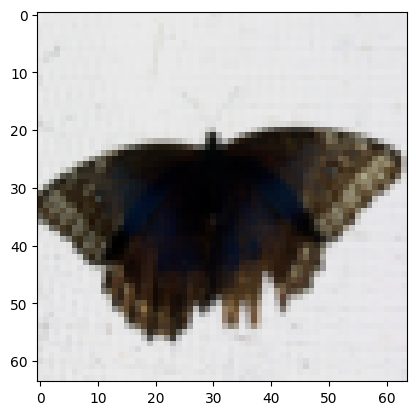

In [14]:
# Example of a picture that was wrongly classified.
index = 13
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

y = 0, you predicted that it is a "non-dog" picture.


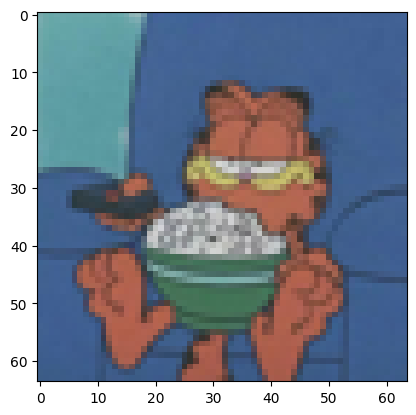

In [30]:
from PIL import Image

img = Image.open("ji.jpg")
img_resized = img.resize((num_px, num_px))
img_rgb = img_resized.convert('RGB')
img_rgb = np.array(img_rgb)

plt.imshow(img_rgb)

img_input = img_rgb.reshape((num_px * num_px * 3,1))

w = d["w"]
b = d["b"]

y_output = np.dot(w.T, img_input) + b

if y_output < 0.5:
    y_final = 0
else:
    y_final = 1
    

print("y = " + str(y_final) + ", you predicted that it is a \"" + classes[y_final].decode("utf-8") +  "\" picture.")